In [1]:
from utils import SimulationEnvironment
from basic_walk.utils import BaseAgent
import sys
import time


import pickle
import matplotlib.pyplot as plt
import numpy as np

from tqc import structures, DEVICE
from tqc.trainer import Trainer
from tqc.structures import Actor, Critic, RescaleAction
from tqc.functions import eval_policy
from tqdm import tqdm, trange
import copy
import torch


from IPython.display import clear_output

## Загрузка обученного агента

In [2]:
def extract_param(info_log, param_name):
    param = []
    for info in info_log:
        param.append(info[param_name])
    
    return param

In [3]:
actor = None
with SimulationEnvironment('scenes/basic_scene.ttt', headless_mode=True, foot_only_mode=True) as env:
    env = RescaleAction(env, -1., 1.)

    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    actor = Actor(state_dim, action_dim).to(DEVICE)

In [4]:
t = 1400000 - 1

# file_name = f"data/models/model_{t+1}_actor"
file_name = f"data/history/high_running_actor"

In [5]:
episodes_log = []
base_states = []
with SimulationEnvironment('scenes/basic_scene.ttt', headless_mode=False, foot_only_mode=True) as env:
    env = RescaleAction(env, -1., 1.)
    
    for i in range(3):
        actor.load_state_dict(torch.load(file_name))
        actor.eval()
        state_dim = env.observation_space.shape[0]
        action_dim = env.action_space.shape[0]
        episodes_log.append([])

        state = env.reset()
#         time.sleep(2)
        base_states.append(state)
        for _ in range(300):
    #             before = time.time()
            action = actor.select_action(state)
    #             after = time.time()

    #             before = time.time()
            state, r, done, info = env.step(action)
            time.sleep(0.01)
    #             after = time.time()
    #             print(after - before)
            episodes_log[-1].append(info)
            if done:
                break

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

# Unit analyse 

In [12]:
episodes_log[0][0].keys()

dict_keys(['fall_metric', 'y', 'x', 'zpos', 'floor_collision', 'fall_prob', 'fall_reward', 'current_velocity', 'velocity_cross_prod', 'velocity_reward', 'mean_joint_distance', 'mean_joint_distance_normalized', 'smooth_reward', 'sum_forces', 'sum_forces_normalized', 'force_reward', 'self_collision', 'reward', 'action', 'state'])

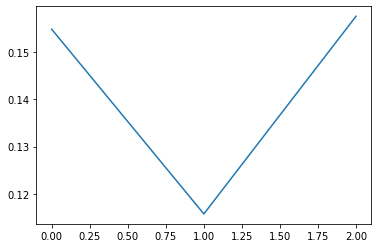

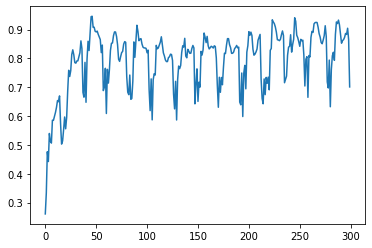

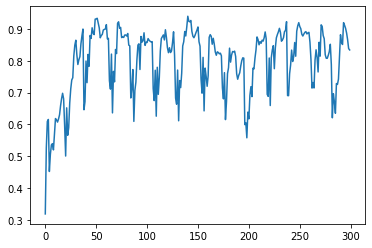

In [14]:
for episode in episodes_log:
    reward = extract_param(episode, "reward")
    plt.plot(reward)
    plt.show()

# Episodes analuse

In [19]:
episodes_log[0][0].keys()

dict_keys(['fall_metric', 'y', 'x', 'zpos', 'fall_reward', 'fall_prob', 'velocity_reward', 'smooth_reward', 'collision_reward', 'reward', 'done', 'action', 'state'])

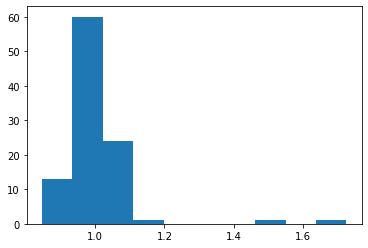

In [27]:
to_hist = [np.sum(extract_param(e, "fall_prob")) for e in  episodes_log]
plt.hist(to_hist)
plt.show()

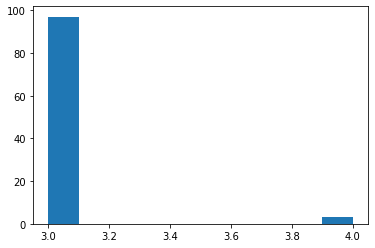

In [22]:
episodes_len = [len(extract_param(e, "reward")) for e in  episodes_log]
plt.hist(episodes_len)
plt.show()

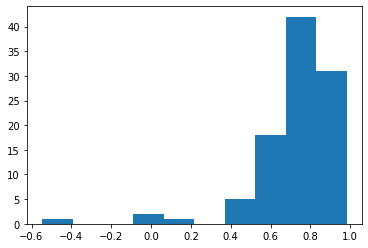

In [21]:
rewards_sum = [np.sum(extract_param(e, "reward")) for e in  episodes_log]
plt.hist(rewards_sum)
plt.show()

In [6]:
rewards_sum = [np.sum(extract_param(e, "reward")) for e in  episodes_log]


(array([ 1.,  4.,  2., 12., 15., 19., 17., 21.,  7.,  2.]),
 array([-18.90271104, -16.25773825, -13.61276545, -10.96779266,
         -8.32281986,  -5.67784707,  -3.03287427,  -0.38790147,
          2.25707132,   4.90204412,   7.54701691]),
 <a list of 10 Patch objects>)

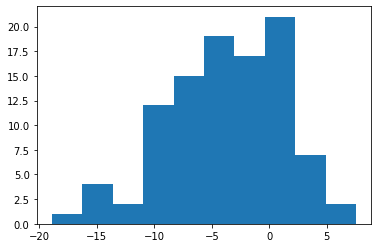

In [7]:
plt.hist(rewards_sum)